# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from IPython.display import Image
from sklearn.tree import export_graphviz
import seaborn as sns
import warnings;
warnings.filterwarnings(action="ignore")

# Load Data

In [2]:
data = pd.read_csv("BANKRUPTCY PREDICTION .csv")
data.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469,1
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794,1
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474,1
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982,1
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490,1


# Exploratory Data Analysis (EDA)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 95 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 1    ROA(A) before interest and % after tax                   6819 non-null   float64
 2    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 3    Operating Gross Margin                                   6819 non-null   float64
 4    Realized Sales Gross Margin                              6819 non-null   float64
 5    Operating Profit Rate                                    6819 non-null   float64
 6    Pre-tax net Interest Rate                                6819 non-null   float64
 7    After-tax net Interest Rate                              6819 non-null   float64
 8    Non-industry inco

In [4]:
data.columns

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan �',
       ' Operating Profit Per Share (Yuan �',
       ' Per Share Net profit before tax (Yuan �',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', '

In [5]:
print('number of row ',data.shape[0])
print('number of column ',data.shape[1])

number of row  6819
number of column  95


In [6]:
data.describe()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000
mean,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,0.047578,0.032263
std,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,0.012679,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.050014,0.176710
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,0.781567,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,0.024477,0.000000
50%,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,0.781635,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,0.033798,0.000000
75%,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,0.781735,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,0.052838,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Checking The Missing Values.

In [7]:
data.isna().sum()

 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Equity to Liability                                        0
Bankrupt                                                    0
Length: 95, dtype: int64

### There are no missing values.

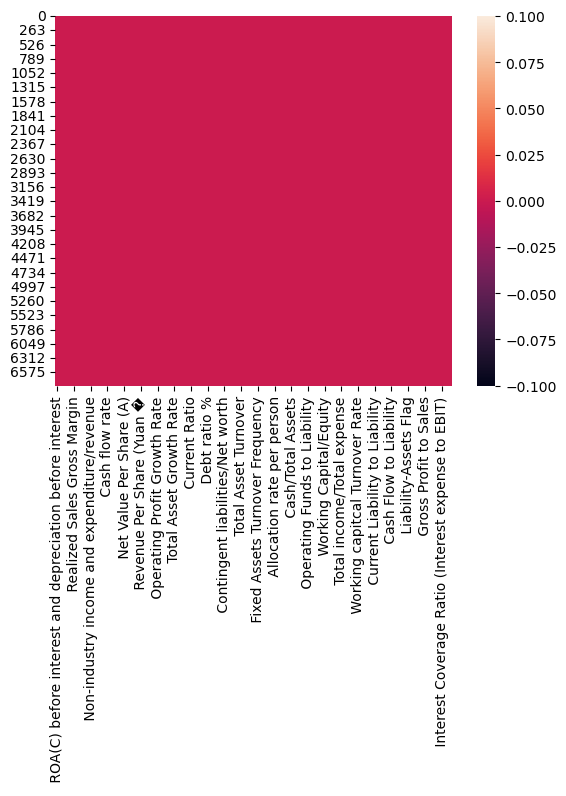

In [8]:
sns.heatmap(data.isnull())
plt.show()

In [9]:
data.duplicated().any()

False

In [10]:
# Check unique values for each variables
for i in data.columns:
    print("No. of unique values in ", i, "is", data[i].nunique())

No. of unique values in   ROA(C) before interest and depreciation before interest is 3333
No. of unique values in   ROA(A) before interest and % after tax is 3151
No. of unique values in   ROA(B) before interest and depreciation after tax is 3160
No. of unique values in   Operating Gross Margin is 3781
No. of unique values in   Realized Sales Gross Margin is 3788
No. of unique values in   Operating Profit Rate is 3376
No. of unique values in   Pre-tax net Interest Rate is 3789
No. of unique values in   After-tax net Interest Rate is 3604
No. of unique values in   Non-industry income and expenditure/revenue is 2551
No. of unique values in   Continuous interest rate (after tax) is 3617
No. of unique values in   Operating Expense Rate is 2966
No. of unique values in   Research and development expense rate is 1536
No. of unique values in   Cash flow rate is 5557
No. of unique values in   Interest-bearing debt interest rate is 1080
No. of unique values in   Tax rate (A) is 2488
No. of uniqu

# Checking the categorical columns.

In [11]:
#creating a for loop to get the categorical columns with 2 or less than 2 unique values
list_1=[]
for i in data.columns:
  x=data[i].value_counts()
  if len(x)<=2:
    list_1.append(i)
  else:
    continue
list_1

[' Liability-Assets Flag', 'Bankrupt']

# Checking the Value Counts of These Categorical Columns

In [12]:
data[' Liability-Assets Flag'].unique()

array([0, 1], dtype=int64)

In [13]:
data[' Liability-Assets Flag'].value_counts()

 Liability-Assets Flag
0    6811
1       8
Name: count, dtype: int64

### This feature has a very large class imbalance and we can drop this feature.

In [14]:
data.drop(columns=[' Liability-Assets Flag'],inplace=True)

In [15]:
data.shape

(6819, 94)

# Checking the Value Count of Output Variable

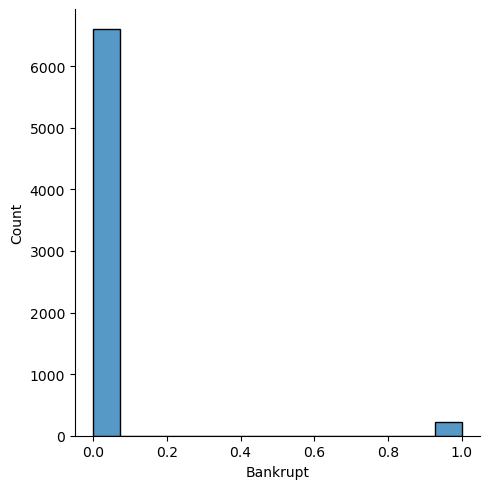

In [16]:
sns.displot(data['Bankrupt'])

# Check For Imbalance Data

In [17]:
data['Bankrupt'].unique()

array([1, 0], dtype=int64)

In [18]:
data['Bankrupt'].value_counts()

Bankrupt
0    6599
1     220
Name: count, dtype: int64

In [19]:
data['Bankrupt'].value_counts(normalize=True)

Bankrupt
0    0.967737
1    0.032263
Name: proportion, dtype: float64

## The output variable is highly imbalanced with minority class accumulating just 3.2% of the data.

In [20]:
x=data.drop('Bankrupt',axis=1)
y=data['Bankrupt']

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,shuffle=True,random_state=42)

In [22]:
# Feature Engineering method along with model building
from sklearn.ensemble import RandomForestClassifier
rf_lable = RandomForestClassifier()
rf_lable.fit(x, y)
df1 = pd.DataFrame({"Feature": x.columns, "RF_importance": rf_lable.feature_importances_}).sort_values(by='RF_importance', ascending=False)
df1

,Feature,RF_importance
18,Persistent EPS in the Last Four Seasons,0.028360
29,Net Value Growth Rate,0.027591
42,Net profit before tax/Paid-in capital,0.026420
88,Net Income to Stockholder's Equity,0.025279
90,Degree of Financial Leverage (DFL),0.021609
...,...,...
44,Total Asset Turnover,0.005528
19,Cash Flow Per Share,0.005256
40,Contingent liabilities/Net worth,0.004532
66,Long-term Liability to Current Assets,0.004204


In [23]:
# Feature Engineering method along with model building
from sklearn.ensemble import GradientBoostingClassifier
GB_lable = GradientBoostingClassifier()
GB_lable.fit(x, y)
df2 = pd.DataFrame({"Feature": x.columns, "GB_importance": GB_lable.feature_importances_}).sort_values(by='GB_importance', ascending=False)
df2

,Feature,GB_importance
29,Net Value Growth Rate,0.095156
88,Net Income to Stockholder's Equity,0.082008
18,Persistent EPS in the Last Four Seasons,0.071198
39,Borrowing dependency,0.060643
56,Cash/Total Assets,0.052424
...,...,...
26,Regular Net Profit Growth Rate,0.000000
7,After-tax net Interest Rate,0.000000
60,Operating Funds to Liability,0.000000
62,Inventory/Current Liability,0.000000


In [24]:
# Feature Engineering method along with model building
from sklearn.tree import DecisionTreeClassifier
dt_lable = DecisionTreeClassifier()
dt_lable.fit(x, y)
df3 = pd.DataFrame({"Feature": x.columns, "dt_importance": dt_lable.feature_importances_}).sort_values(by='dt_importance', ascending=False)
df3

,Feature,dt_importance
29,Net Value Growth Rate,0.176828
39,Borrowing dependency,0.050473
2,ROA(B) before interest and depreciation after...,0.047317
13,Interest-bearing debt interest rate,0.046577
33,Quick Ratio,0.040739
...,...,...
40,Contingent liabilities/Net worth,0.000000
49,Net Worth Turnover Rate (times),0.000000
57,Quick Assets/Current Liability,0.000000
59,Current Liability to Assets,0.000000


In [25]:
# Imbalance treatement
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)
print("Original value count :", y.value_counts())
print("*************SMOTE Method**********************")
print("After Smote value count :", y_smote.value_counts())

Original value count : Bankrupt
0    6599
1     220
Name: count, dtype: int64
*************SMOTE Method**********************
After Smote value count : Bankrupt
1    6599
0    6599
Name: count, dtype: int64


# Split Data In too Train And Test Data Sets

In [26]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,shuffle=True,random_state=42)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.25, random_state=101,
                                                    stratify=y_smote)

# Traditional Machine Learning Algorithm
## RandomForest, XGBoost, LogisticRegression

In [27]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,shuffle=True,random_state=42)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.25, random_state=101,
                                                    stratify=y_smote)

# RandomForest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

# Evaluation matrix
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print("*************classification_report*************")
print(classification_report(y_train, y_pred_train))
print("**************************")
print(classification_report(y_test, y_pred_test))

print("*************accuracy_score*************")
print(accuracy_score(y_train, y_pred_train))
print("**************************")
print(accuracy_score(y_test, y_pred_test))

*************classification_report*************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4949
           1       1.00      1.00      1.00      4949

    accuracy                           1.00      9898
   macro avg       1.00      1.00      1.00      9898
weighted avg       1.00      1.00      1.00      9898

**************************
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1650
           1       0.97      1.00      0.98      1650

    accuracy                           0.98      3300
   macro avg       0.98      0.98      0.98      3300
weighted avg       0.98      0.98      0.98      3300

*************accuracy_score*************
1.0
**************************
0.9806060606060606


In [29]:
# CrossValidation method
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(rf, x_train, y_train, cv=10)
print(training_accuracy.mean())
print("********************")
print(training_accuracy.max())

0.9787836913114972
********************
0.9868686868686869


# XGBoost Classifier

In [30]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred_train_xgb = xgb.predict(x_train)
y_pred_test_xgb = xgb.predict(x_test)

# Evaluation matrix
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print("*************classification_report*************")
print(classification_report(y_train, y_pred_train_xgb))
print("**************************")
print(classification_report(y_test, y_pred_test_xgb))

print("*************accuracy_score*************")
print(accuracy_score(y_train, y_pred_train_xgb))
print("**************************")
print(accuracy_score(y_test, y_pred_test_xgb))

*************classification_report*************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4949
           1       1.00      1.00      1.00      4949

    accuracy                           1.00      9898
   macro avg       1.00      1.00      1.00      9898
weighted avg       1.00      1.00      1.00      9898

**************************
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1650
           1       0.97      1.00      0.99      1650

    accuracy                           0.99      3300
   macro avg       0.99      0.99      0.99      3300
weighted avg       0.99      0.99      0.99      3300

*************accuracy_score*************
1.0
**************************
0.9857575757575757


In [31]:
# CrossValidation method
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(xgb, x_train, y_train, cv=10)
print(training_accuracy.mean())
print("********************")
print(training_accuracy.max())

0.9872705824677513
********************
0.9919191919191919


In [49]:
x_train.shape

(9898, 93)

# LogisticRegression

In [32]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred_train = log_reg.predict(x_train)
y_pred_test = log_reg.predict(x_test)

# Evaluation matrix
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print("*************classification_report*************")
print(classification_report(y_train, y_pred_train))
print("**************************")
print(classification_report(y_test, y_pred_test))

print("*************accuracy_score*************")
print(accuracy_score(y_train, y_pred_train))
print("**************************")
print(accuracy_score(y_test, y_pred_test))

*************classification_report*************
              precision    recall  f1-score   support

           0       0.59      0.71      0.65      4949
           1       0.64      0.50      0.56      4949

    accuracy                           0.61      9898
   macro avg       0.61      0.61      0.60      9898
weighted avg       0.61      0.61      0.60      9898

**************************
              precision    recall  f1-score   support

           0       0.60      0.73      0.66      1650
           1       0.66      0.51      0.57      1650

    accuracy                           0.62      3300
   macro avg       0.63      0.62      0.62      3300
weighted avg       0.63      0.62      0.62      3300

*************accuracy_score*************
0.6066882198423924
**************************
0.62


In [33]:
# CrossValidation method
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(log_reg, x_train, y_train, cv=10)
print(training_accuracy.mean())
print("********************")
print(training_accuracy.max())

0.6048733033060636
********************
0.6339737108190091


# DECISION_TREE_MODEL

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [5,10,20,25],
    'min_samples_leaf' : [10,20,30,40]
}

In [37]:
grid_search = GridSearchCV(dt_model, params, cv = 5 )

In [38]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 25],
                         'min_samples_leaf': [10, 20, 30, 40]})

In [39]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 10}


In [40]:
print(grid_search.best_score_)

0.9395843732933173


In [41]:
dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 20, min_samples_leaf = 30)

In [42]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=30)

## Graphical Represetation Of Tree

In [43]:
from io import StringIO
import pydotplus

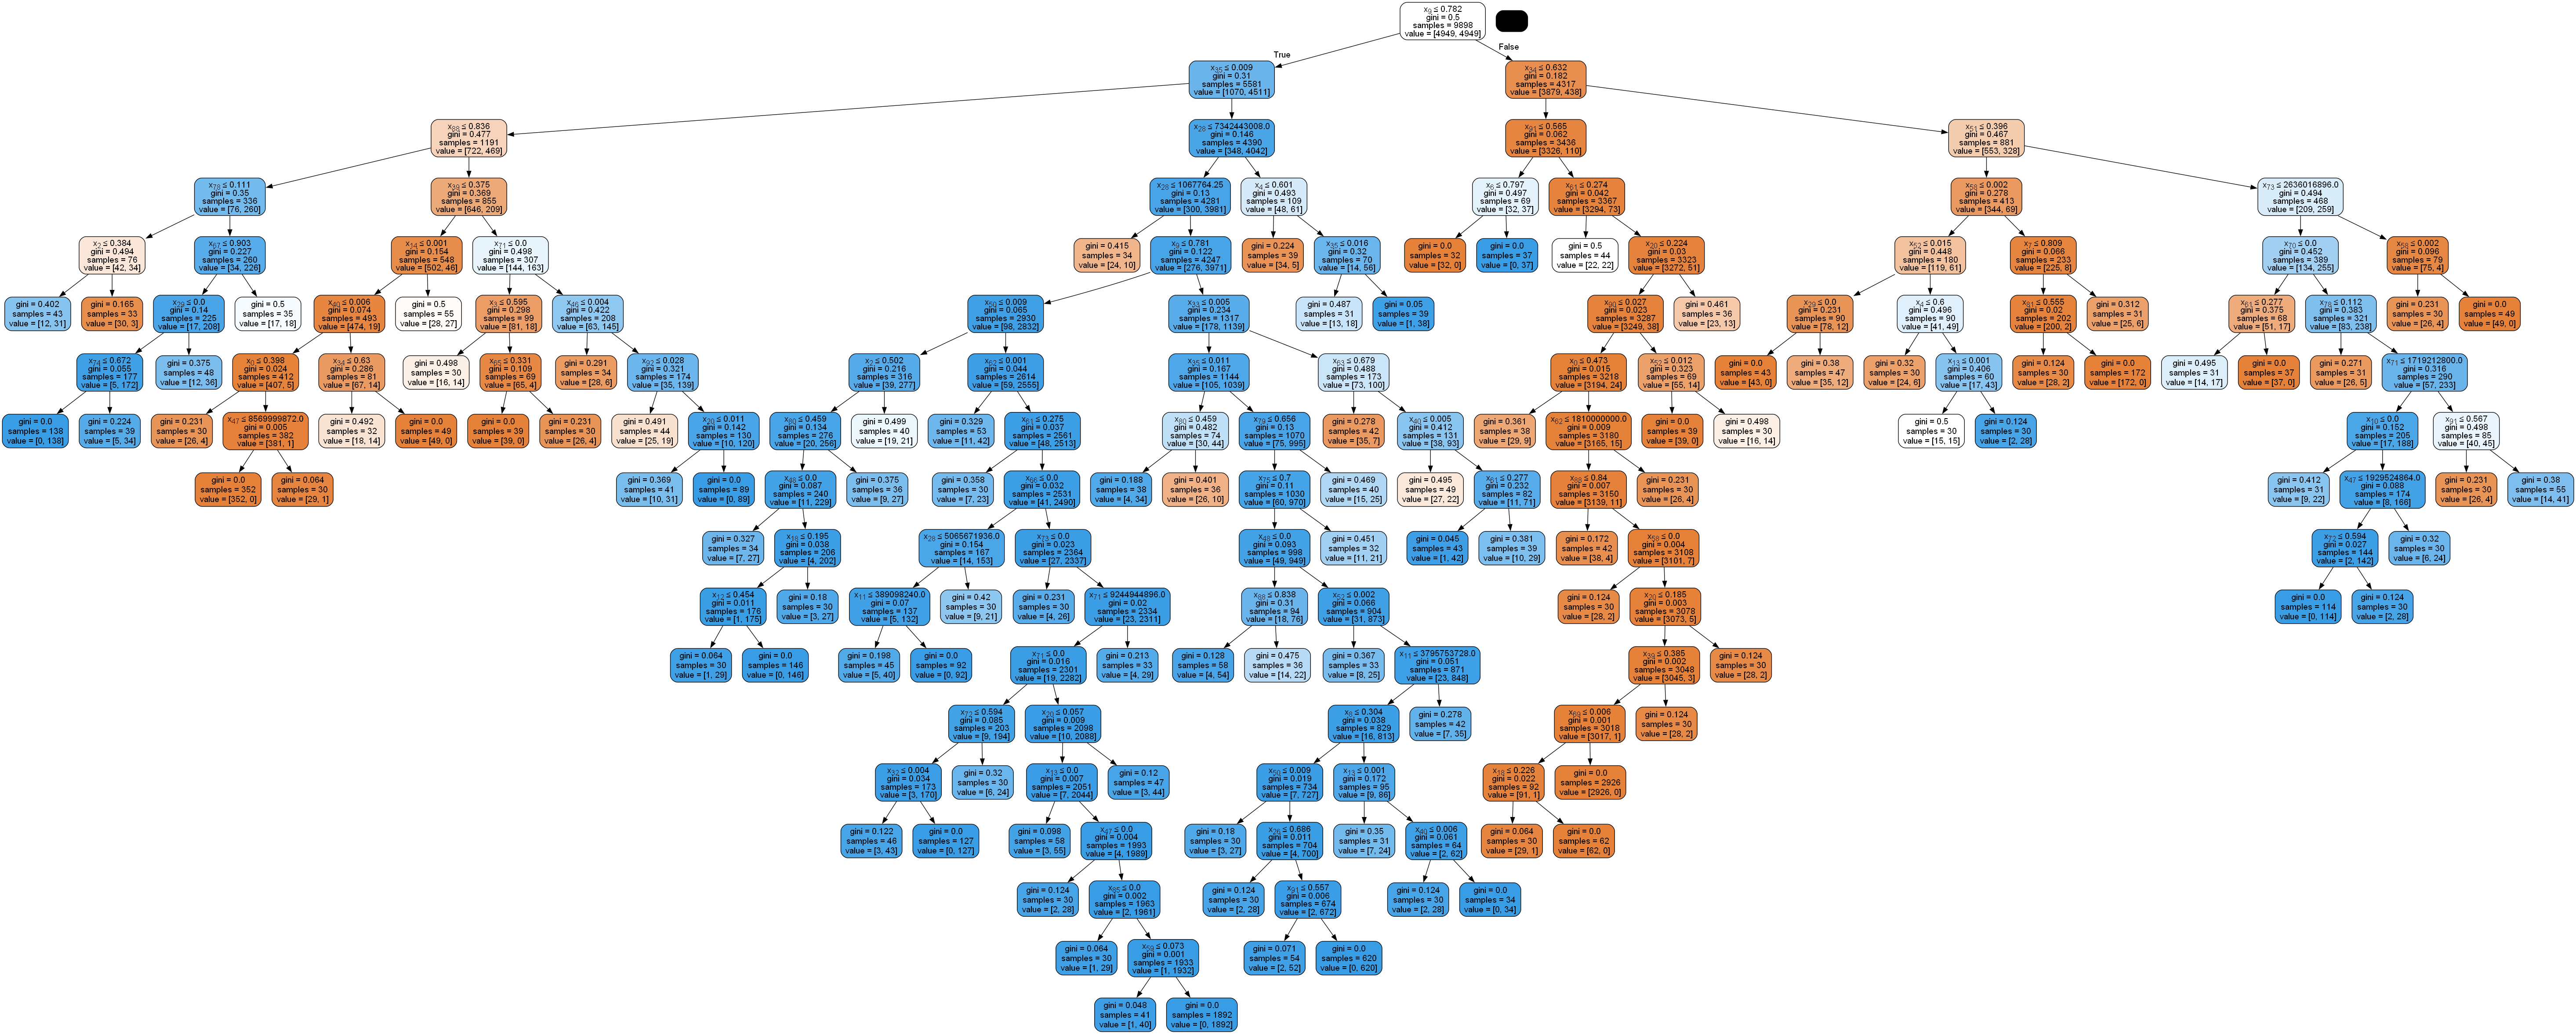

<Figure size 1000x800 with 0 Axes>

In [44]:
plt.figure(figsize=(10,8))
dot_data = StringIO()
export_graphviz(dt_model, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [45]:
dt_pred = dt_model.predict(x_test)

In [46]:
dt_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [47]:
train_dt_pred = dt_model.predict(x_train)

In [55]:
print("Testing Classification Report of DecisionTreeClassifier : ")
print(classification_report(y_test, dt_pred))

print("Training Classification Report of DecisionTreeClassifier : ")
print(classification_report(y_train, train_dt_pred))

print("*************accuracy_score*************")
print(accuracy_score(y_train, train_dt_pred))
print("**************************")
print(accuracy_score(y_test, dt_pred))

Testing Classification Report of DecisionTreeClassifier : 
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1650
           1       0.92      0.94      0.93      1650

    accuracy                           0.93      3300
   macro avg       0.93      0.93      0.93      3300
weighted avg       0.93      0.93      0.93      3300

Training Classification Report of DecisionTreeClassifier : 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4949
           1       0.94      0.94      0.94      4949

    accuracy                           0.94      9898
   macro avg       0.94      0.94      0.94      9898
weighted avg       0.94      0.94      0.94      9898

*************accuracy_score*************
0.9416043645180845
**************************
0.9284848484848485


Training Classification Report of DecisionTreeClassifier : 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4949
           1       0.94      0.94      0.94      4949

    accuracy                           0.94      9898
   macro avg       0.94      0.94      0.94      9898
weighted avg       0.94      0.94      0.94      9898



In [56]:
# CrossValidation method
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(dt_model, x_train, y_train, cv=10)
print(training_accuracy.mean())
print("********************")
print(training_accuracy.max())

0.9221068112878023
********************
0.9333333333333333
